## Stationarize time series

#### < General rule for time-series analysis >

Before going any further into our analysis, our series has to be made stationary.

Stationary: property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.). \
If the mean of a time-series increases over time, then it’s not stationary.

#### < Why statonarize time series >

More likely than not your time series will not be stationary which means that you will have to identify the trends present in your series and manipulate the data to become stationary. 
After the trends are removed you can apply advanced modeling techniques while maintaining the valuable knowledge of the separated trends, which will be used later.

Stationarity is a critical concept in time series analysis. A stationary time series is one in which statistical properties, such as mean and variance, remain constant over time. Working with stationary series is essential for several reasons when analyzing time series data:

- Easier Modeling: Stationary series are more straightforward to model and forecast. Many time series models assume stationarity as an underlying assumption.
- Meaningful Interpretation: Stationary data enables a more meaningful interpretation of trends, patterns, and relationships within the data.
- Statistical Tests: Many statistical tests and techniques rely on the assumption of stationarity. For example, tests for autocorrelation and cointegration assume stationarity.

In [3]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# statsmodels seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

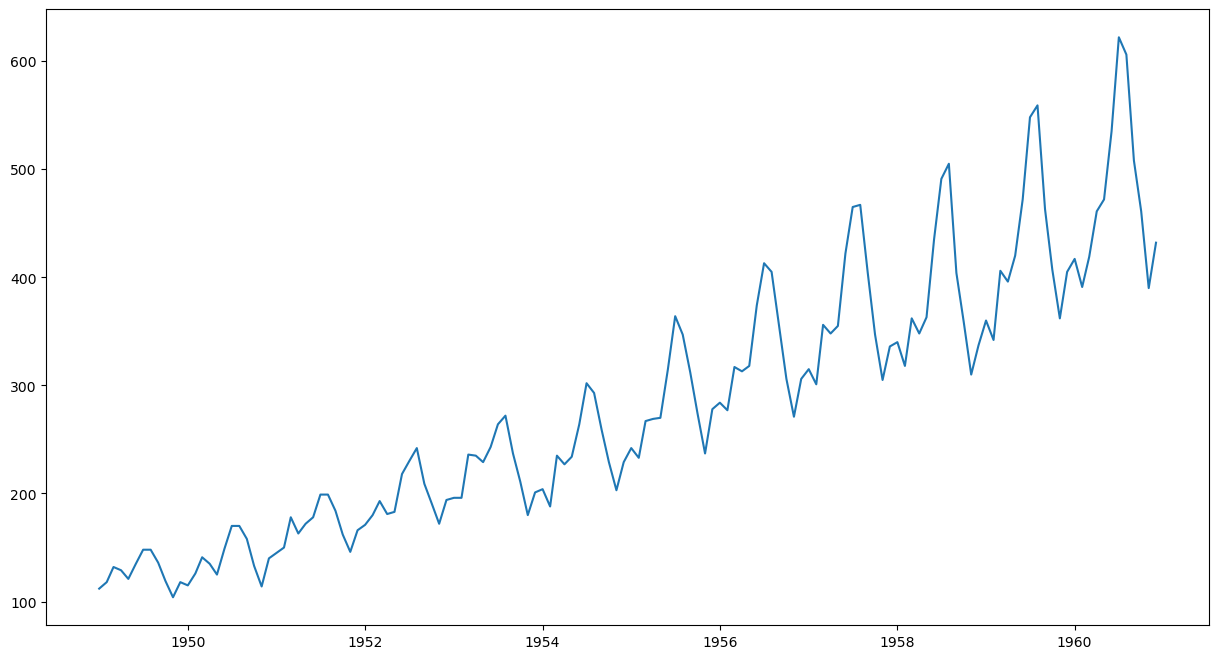

In [2]:
# import Airline datasets

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url,index_col=0, header = 0, parse_dates=['Month'])

# plot the Airline dataset grapgh
plt.figure(figsize = (15,8))
plt.plot(df)

#### (1) Transformation

There are several transformations available in Python’s NumPy library including logarithms, square roots, and more. 

In [3]:
# Create transformation columns

# Calculate the log of data
df['Passengers_log'] = np.log(df['Passengers'])

# Calculate the square root of data
df['Passengers_sqrt'] = np.sqrt(df['Passengers'])

# Calculate the cubed root of data
df['Passengers_cbrt'] = np.cbrt(df['Passengers'])

In [4]:
df

,Passengers,Passengers_log,Passengers_sqrt,Passengers_cbrt
Month,,,,
1949-01-01,112,4.718499,10.583005,4.820285
1949-02-01,118,4.770685,10.862780,4.904868
1949-03-01,132,4.882802,11.489125,5.091643
1949-04-01,129,4.859812,11.357817,5.052774
1949-05-01,121,4.795791,11.000000,4.946087
...,...,...,...,...
1960-08-01,606,6.406880,24.617067,8.462348
1960-09-01,508,6.230481,22.538855,7.979112
1960-10-01,461,6.133398,21.470911,7.725032


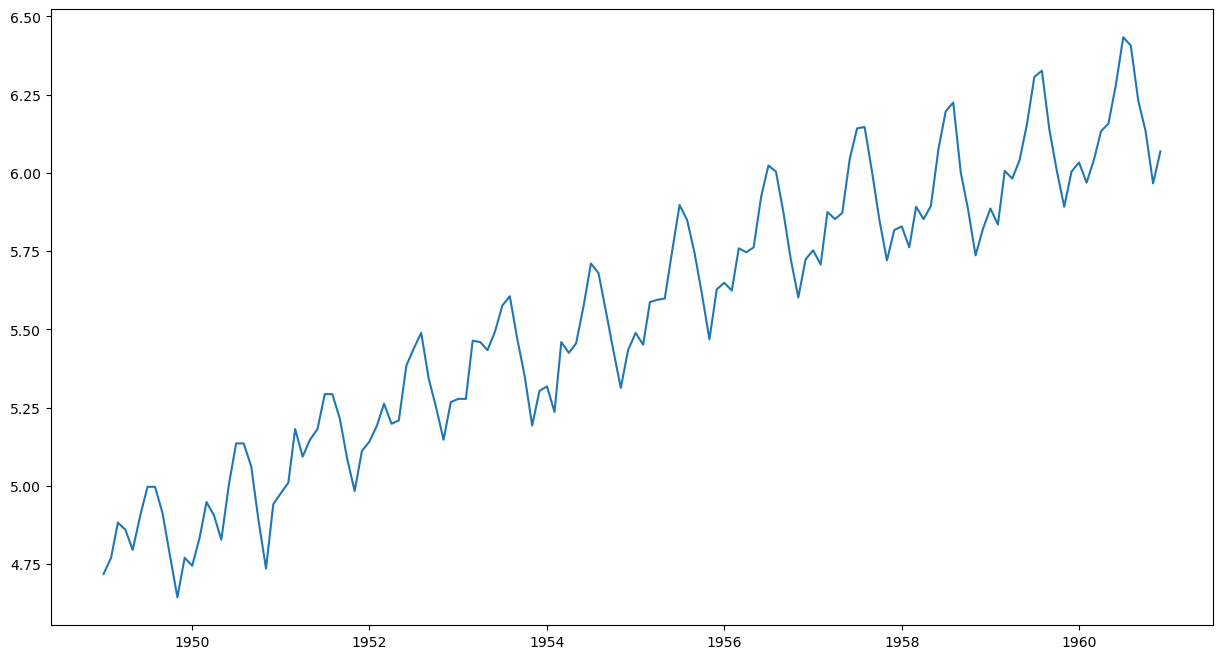

In [5]:
# plot the Airline dataset grapgh
plt.figure(figsize = (15,8))
plt.plot( df['Passengers_log'])

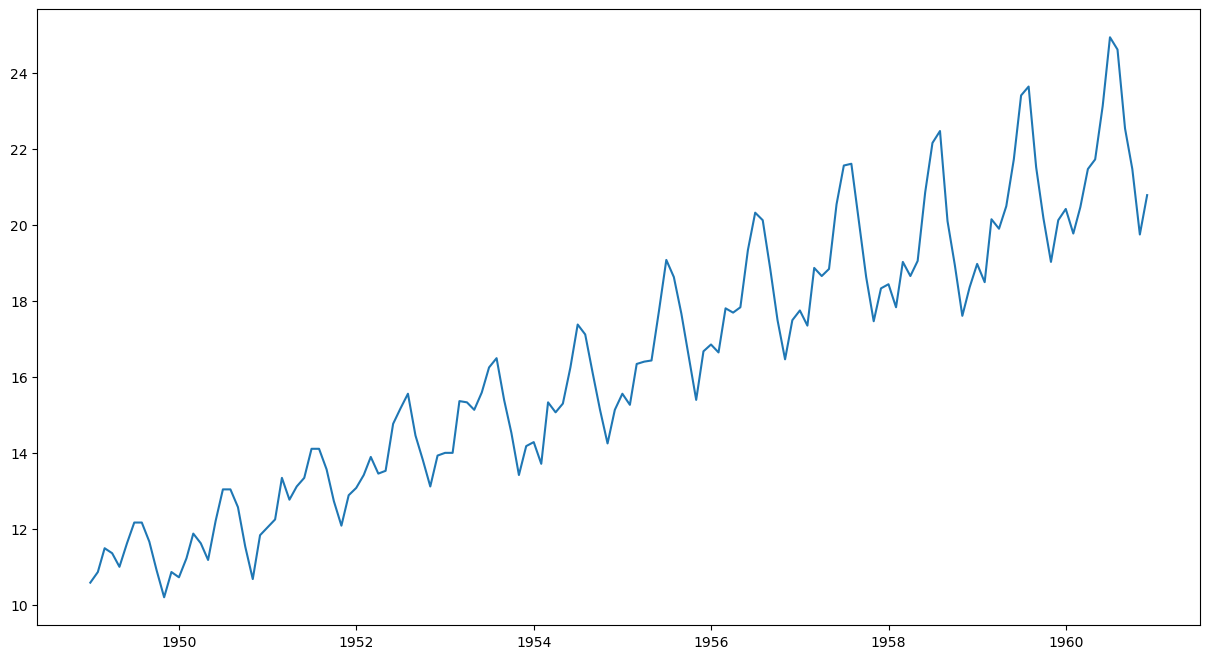

In [6]:
# plot the Airline dataset grapgh
plt.figure(figsize = (15,8))
plt.plot( df['Passengers_sqrt'])

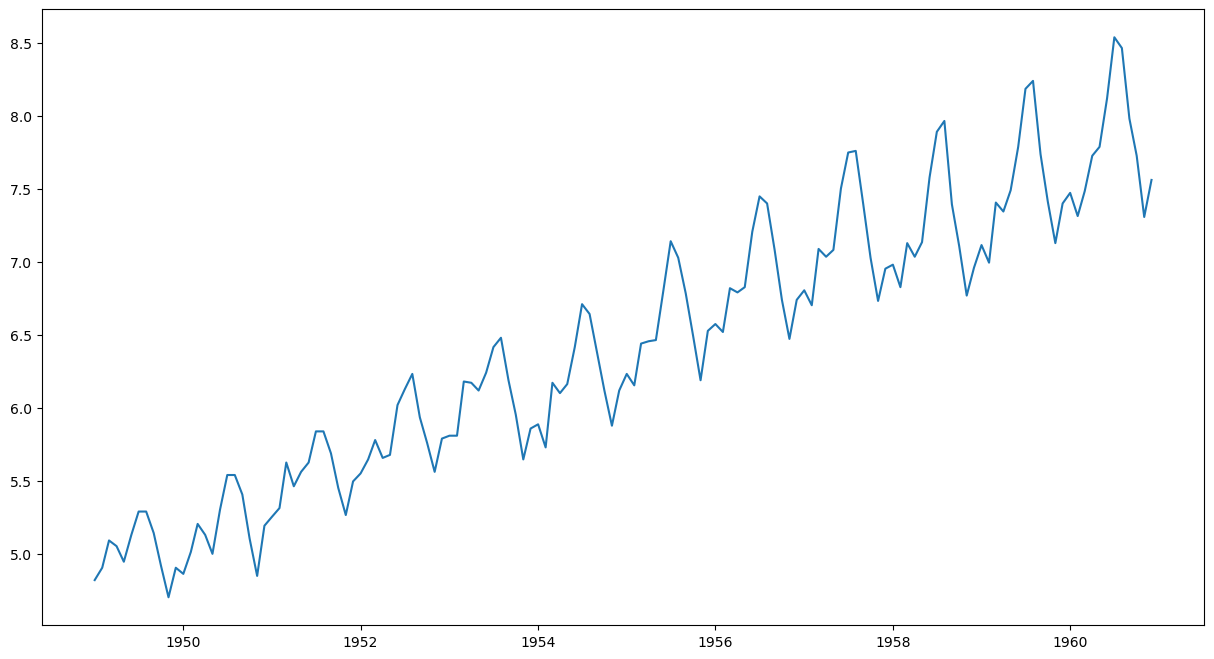

In [7]:
# plot the Airline dataset grapgh
plt.figure(figsize = (15,8))
plt.plot( df['Passengers_cbrt'])

#### (2) Rolling mean

- A rolling mean is the mean of the previous x number of observations in the series, where the time between each observation is consistent.

In [8]:
# rolling mean for passengers data

df['Passengers_rolling_mean'] = df['Passengers'].rolling(12).mean()
df['Passengers_rolling_std'] = df['Passengers'].rolling(12).std()

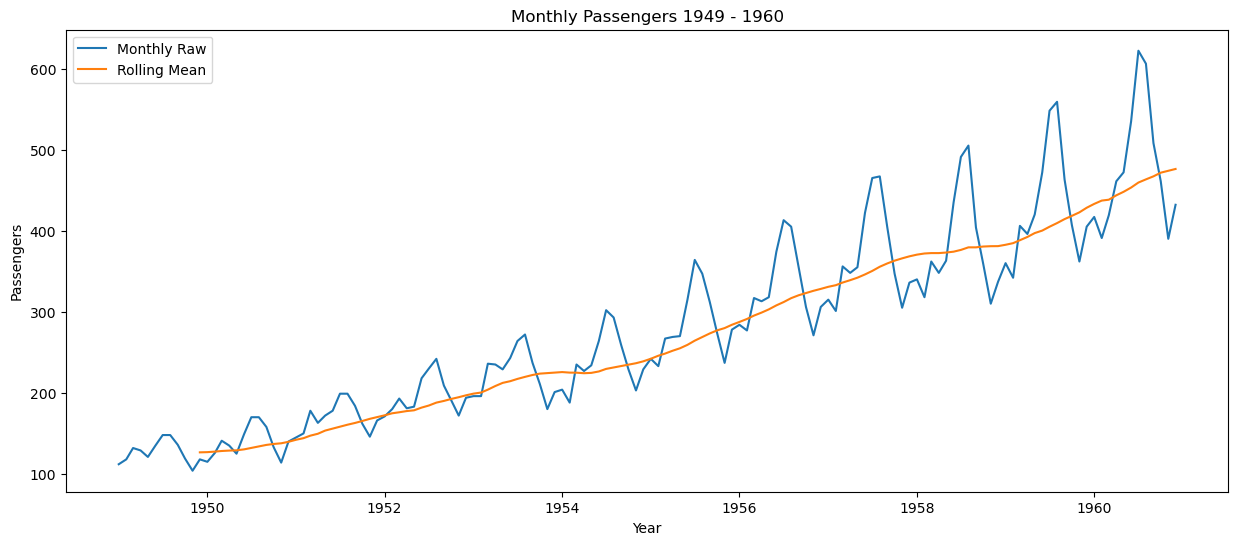

In [9]:
# check the stationary using rolling mean

plt.figure(figsize = (15,6))
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Monthly Passengers 1949 - 1960', fontsize = 12)
plt.plot(df['Passengers'], label = 'Monthly Raw')
plt.plot(df['Passengers_rolling_mean'], label = 'Rolling Mean')
plt.legend()
plt.show()

Additionally, we can use rolling mean subtracted from the original closing price column and charted it below to see if this improved stationarity in the series.

- This series appears to be much closer to stationarity. 
- The upward trend is virtually gone but the variance is still apparent. 

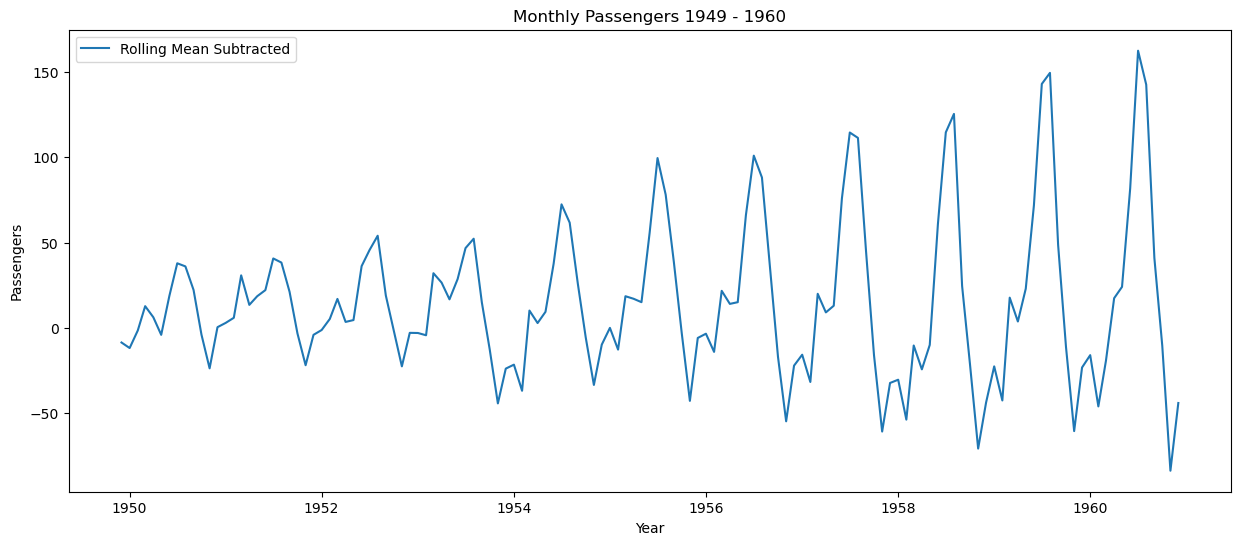

In [10]:
# check the stationary using rolling mean

plt.figure(figsize = (15,6))
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Monthly Passengers 1949 - 1960', fontsize = 12)
plt.plot(df['Passengers'] - df['Passengers_rolling_mean'], label = 'Rolling Mean Subtracted')
plt.legend()
plt.show()

#### (3) Differencing

- Another method for removing trends in time series data is differencing. 
- This is the process subtracting the value of one observation with the value of another observation x number of periods ago, where x is the time period lag.
- For instance, in the S&P 500 example, if the lag is one year then the differencing value on January 1, 2020 is equal to the actual price observed on January 1, 2020 minus the value observed on January 1, 2019. 

In [18]:
# diferencing method
# differencing for 12 months , 1 year

df['Passengers_diff_12'] = df['Passengers'].diff(periods = 12)

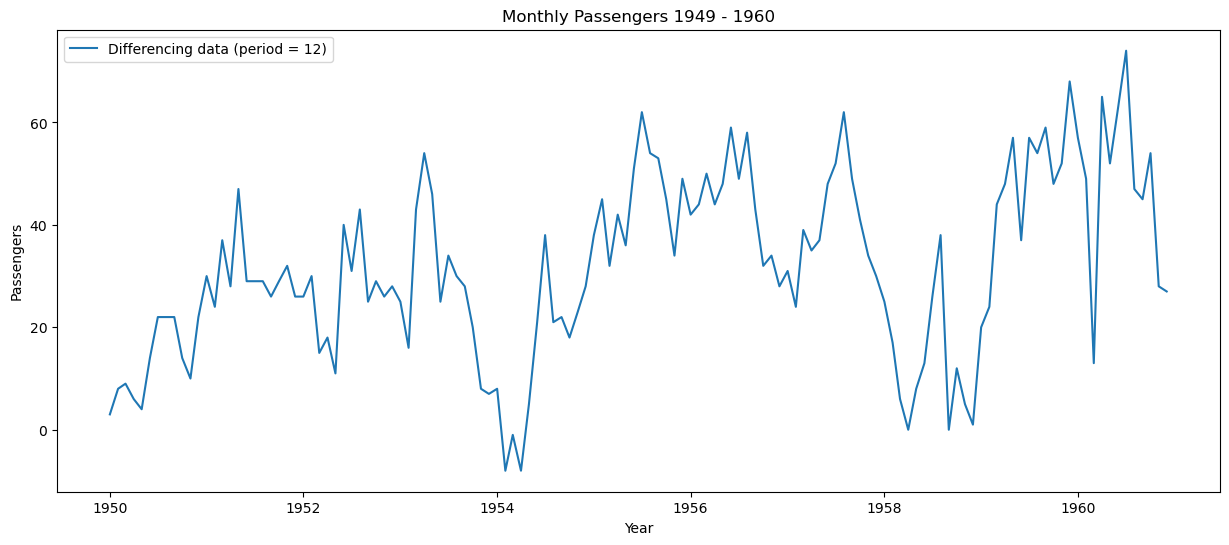

In [20]:
# check the stationary using differencing methods

plt.figure(figsize = (15,6))
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Monthly Passengers 1949 - 1960', fontsize = 12)
plt.plot(df['Passengers_diff_12'], label = 'Differencing data (period = 12)')
plt.legend()
plt.show()

#### GDP data (USA)

In [4]:
# read datasets of GDP per country

df_gdp = pd.read_csv('GDP.csv', header = 0)
df_gdp = df_gdp.drop('Country Code', axis = 1)

# billions formatter

from matplotlib.ticker import FuncFormatter

def billions_formatter(x, pos):
    return f'{x/1e9:.0f}B'

# show all country name

# >>print(df_gdp.Country.tolist())

Text(0, 0.5, 'Billion Dollars')

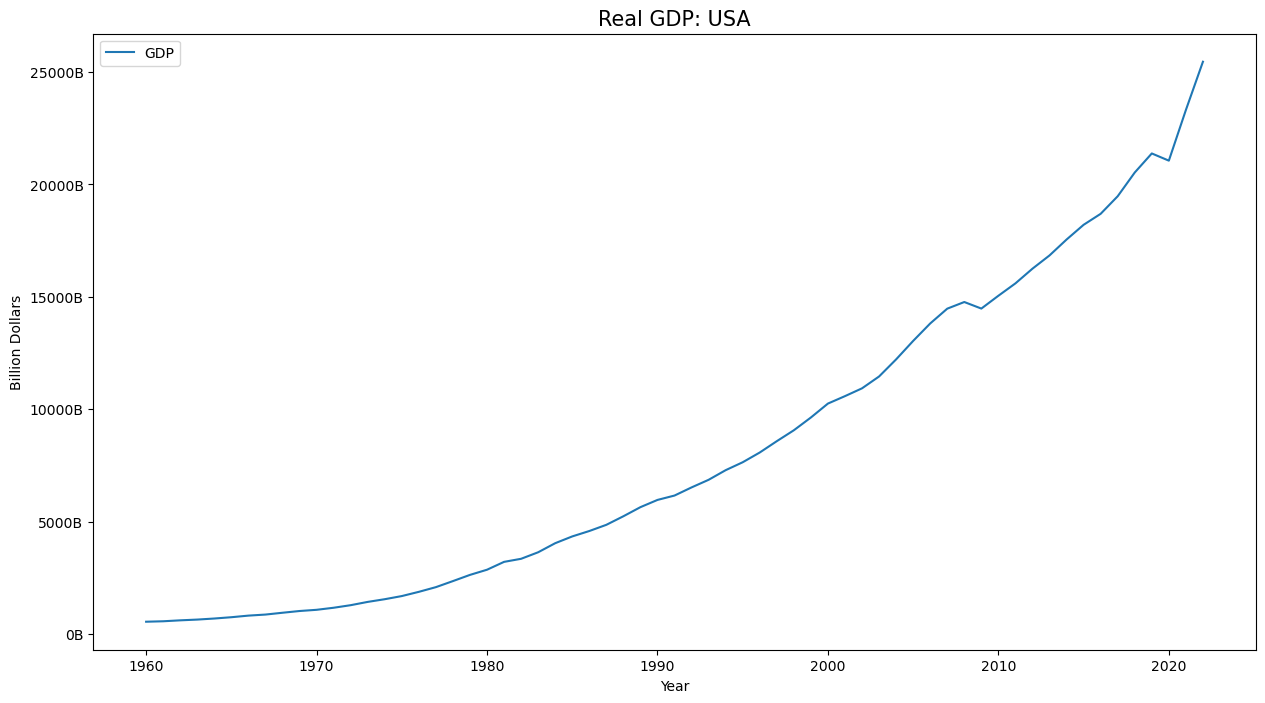

In [5]:
# plot gdp per year for USA

df_usa = df_gdp[df_gdp.Country == 'United States'].iloc[:,1:].transpose()
df_usa = df_usa.rename(columns = {251: 'GDP'})
df_usa.index.name = 'Year'

df_usa.plot(figsize = (15,8))
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.title('Real GDP: USA', size = 15)
plt.ylabel('Billion Dollars')

In [6]:
# Standardize data

# Apply logarithmic transformation
df_usa['GDP_logs'] = np.log(df_usa['GDP'])

# Calculate first differences
df_usa["GDP_diff"] = df_usa['GDP_logs'].diff()

# Convert to growth rates (multiply by 100)
df_usa['GDP_growth'] = df_usa['GDP_diff'] * 100

# Display the transformed dataset
df_usa

,GDP,GDP_logs,GDP_diff,GDP_growth
Year,,,,
1960,5.433000e+11,27.020927,NaN,NaN
1961,5.633000e+11,27.057078,0.036151,3.615069
1962,6.051000e+11,27.128660,0.071581,7.158139
1963,6.386000e+11,27.182544,0.053885,5.388455
1964,6.858000e+11,27.253852,0.071308,7.130776
...,...,...,...,...
2018,2.053306e+13,30.653057,0.052785,5.278458
2019,2.138098e+13,30.693523,0.040465,4.046542
2020,2.106047e+13,30.678419,-0.015104,-1.510357


Text(0, 0.5, 'Percentage change')

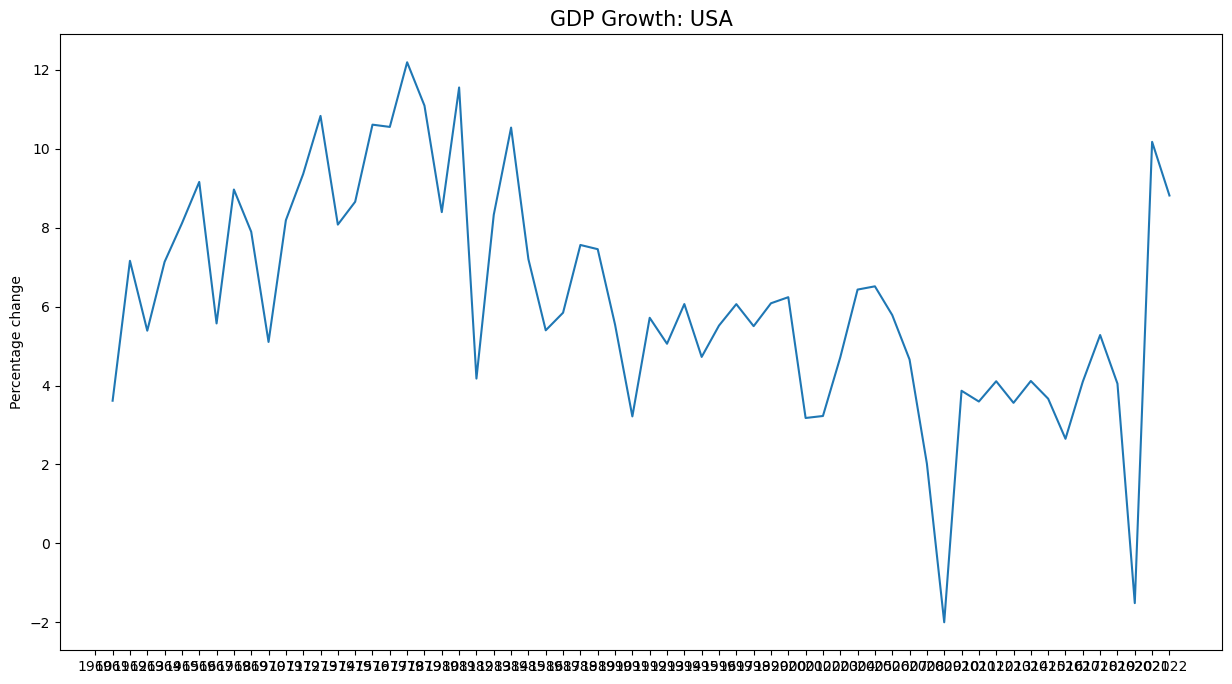

In [7]:
# plot gdp growth

plt.figure(figsize = (15,8))
plt.plot(df_usa['GDP_growth'])
plt.title('GDP Growth: USA', size = 15)
plt.ylabel('Percentage change')

#### GDP Data (Malaysia)

Text(0, 0.5, 'Billion Dollars')

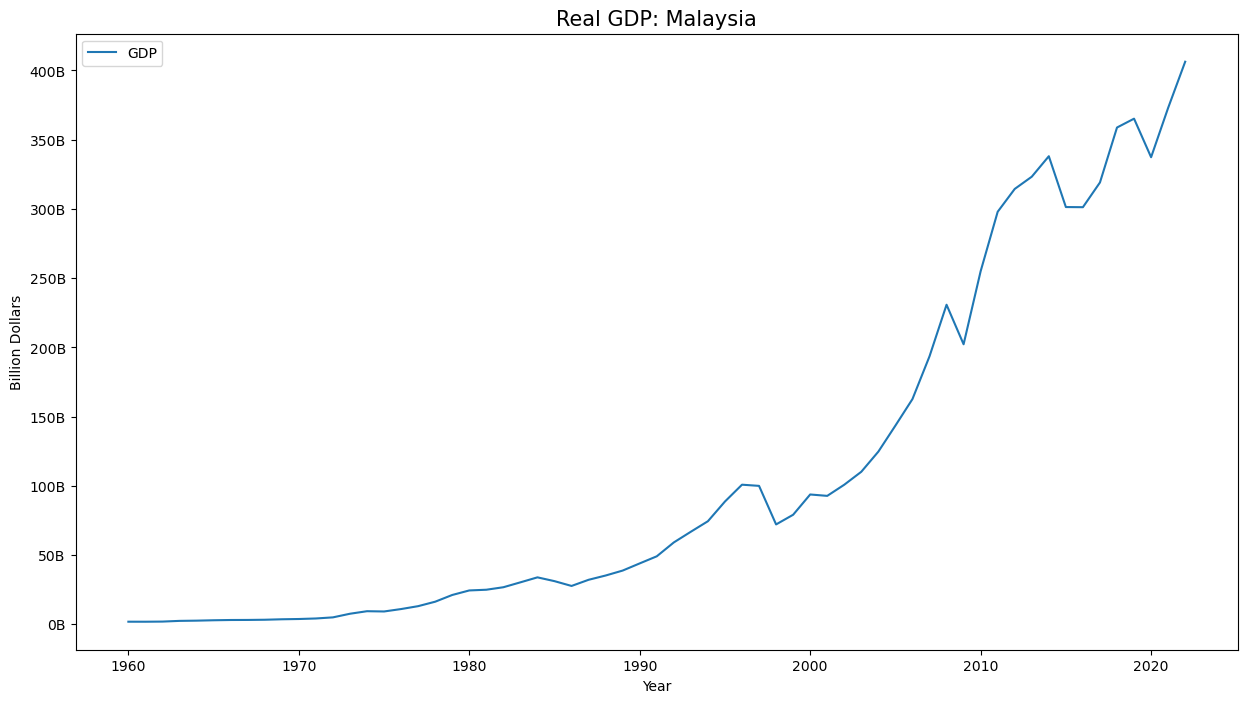

In [8]:
# plot gdp per year for USA

df_my = df_gdp[df_gdp.Country == 'Malaysia'].iloc[:,1:].transpose()
df_my = df_my.rename(columns = {169: 'GDP'})
df_my.index.name = 'Year'

df_my.plot(figsize = (15,8))
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.title('Real GDP: Malaysia', size = 15)
plt.ylabel('Billion Dollars')

In [12]:
# Standardize the data

# Apply logarithmic transformation
df_my['GDP_logs'] = np.log(df_my['GDP'])

# Calculate first differences
df_my["GDP_diff"] = df_my['GDP_logs'].diff()

# Convert to growth rates (multiply by 100)
df_my['GDP_growth'] = df_my['GDP_diff'] * 100

# GDP Growth Rate
df_my['GDP_growth_rate'] = (df_my['GDP'].pct_change()) * 100

# Display the transformed dataset
df_my

,GDP,GDP_logs,GDP_diff,GDP_growth,GDP_growth_rate
Year,,,,,
1960,1.916229e+09,21.373625,NaN,NaN,NaN
1961,1.901856e+09,21.366096,-0.007529,-0.752913,-0.750085
1962,2.001490e+09,21.417158,0.051061,5.106139,5.238750
1963,2.510110e+09,21.643593,0.226435,22.643501,25.412110
1964,2.674424e+09,21.707000,0.063407,6.340729,6.546070
...,...,...,...,...,...
2018,3.587888e+11,26.606000,0.117201,11.720095,12.434534
2019,3.651777e+11,26.623650,0.017650,1.765020,1.780688
2020,3.373395e+11,26.544356,-0.079294,-7.929447,-7.623214


Text(0, 0.5, 'Percentage change')

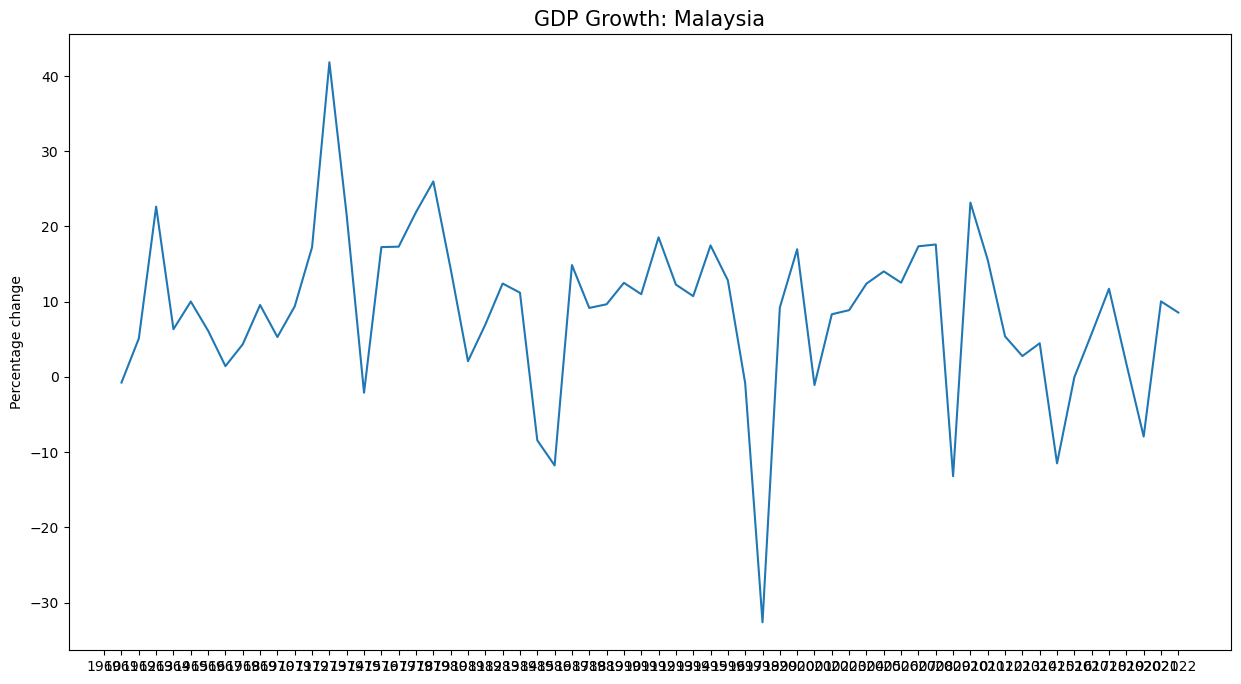

In [13]:
# plot gdp growth

plt.figure(figsize = (15,8))
plt.plot(df_my['GDP_growth'])
plt.title('GDP Growth: Malaysia', size = 15)
plt.ylabel('Percentage change')

Text(0, 0.5, 'Percentage change')

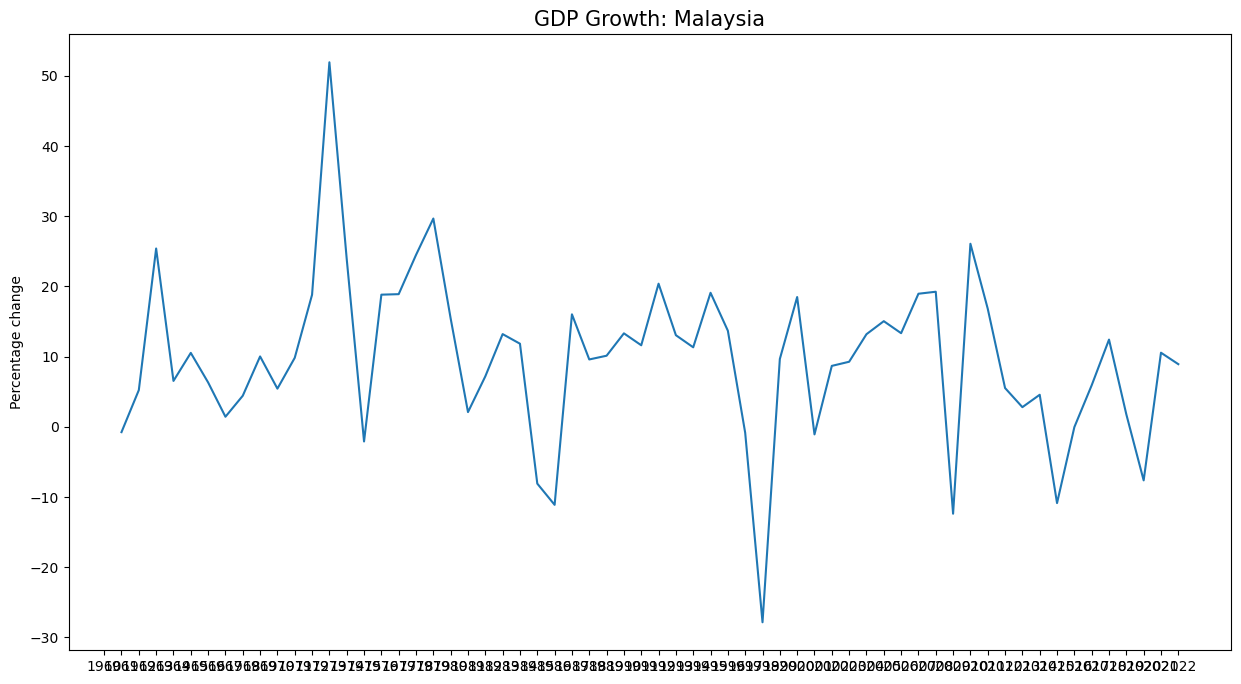

In [14]:
# plot gdp growth rate

plt.figure(figsize = (15,8))
plt.plot(df_my['GDP_growth_rate'])
plt.title('GDP Growth: Malaysia', size = 15)
plt.ylabel('Percentage change')